# WeatherPy

---

## Generating Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generating the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Creating a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identifying nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


## Plots to Showcase the Relationship Between Weather Variables and Latitude

### Using OpenWeatherMap API to retrieve weather data from the cities list 

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Fetch weather data
for i, city in enumerate(cities):

    # Grouping cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Creating endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    response = requests.get(city_url)
    data=response.json()

    # Loging the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = data["weather"]
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data["coord"]["lat"]
        city_lng = data["coord"]["lon"]
        city_max_temp = data["main"]["temp_max"]
        city_humidity = data["main"]["humidity"]
        city_clouds = data["clouds"]["all"]
        city_wind = data["wind"]["speed"]
        city_country = data["sys"]["country"]
        city_date = data["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | novodvinsk
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | fort bragg
Processing Record 5 of Set 1 | pailon
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | almeirim
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | copiapo
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | kiama
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | bouar
Processing Record 15 of Set 1 | lensk
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | zhangatas
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | charikar
Processing Record 20 of Set 1 | susuman
Processing Record 21 of Set 1 | lihue
Processing Record 22 of Set 1 | pennadam
Processing Record

In [4]:
# Converting  cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [6]:
# View sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,79.14,80,14,23.87,MU,1710617215
1,novodvinsk,64.4165,40.8122,32.79,99,100,8.66,RU,1710617215
2,waitangi,-43.9535,-176.5597,56.82,80,69,14.00,NZ,1710616996
3,fort bragg,35.1390,-79.0060,74.64,51,75,4.61,US,1710617020
4,pailon,-17.6500,-62.7500,95.90,41,92,15.50,BO,1710617217


In [7]:
# Exporting the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# View sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,79.14,80,14,23.87,MU,1710617215
1,novodvinsk,64.4165,40.8122,32.79,99,100,8.66,RU,1710617215
2,waitangi,-43.9535,-176.5597,56.82,80,69,14.00,NZ,1710616996
3,fort bragg,35.1390,-79.0060,74.64,51,75,4.61,US,1710617020
4,pailon,-17.6500,-62.7500,95.90,41,92,15.50,BO,1710617217


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
#converting date
from datetime import datetime
city_data_df["Converted_Date"] = city_data_df["Date"].apply(lambda x: datetime.utcfromtimestamp(x))
city_data_df["Converted_Date_Only"] = city_data_df["Converted_Date"].apply(lambda x: x.date())
date = city_data_df["Converted_Date_Only"][0]
date


datetime.date(2024, 3, 16)

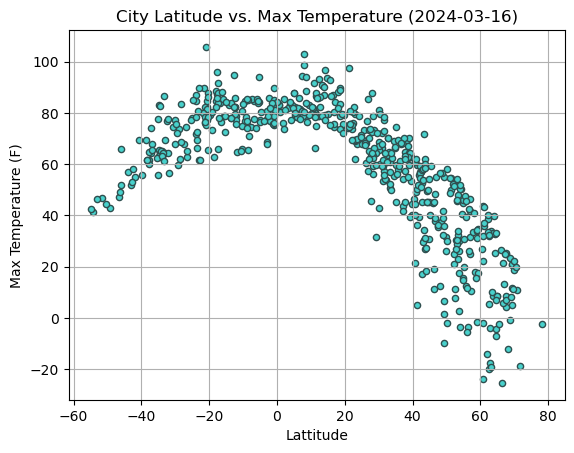

In [10]:
# Scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat", y="Max Temp", kind = "scatter", color = "mediumturquoise", edgecolors = "darkslategrey")

plt.ylabel("Max Temperature (F)")
plt.xlabel("Lattitude")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid()

# Save figure
plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

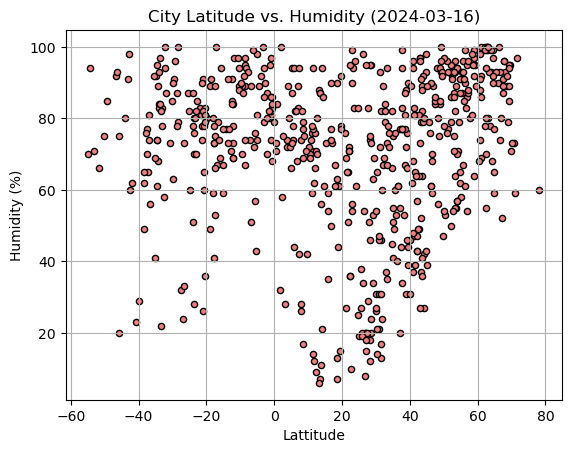

In [11]:
# Scatter plots for latitude vs. humidity
city_data_df.plot(x="Lat", y="Humidity", kind = "scatter", color = "lightcoral", edgecolors = "black")

plt.ylabel("Humidity (%)")
plt.xlabel("Lattitude")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid()

# Save figure
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

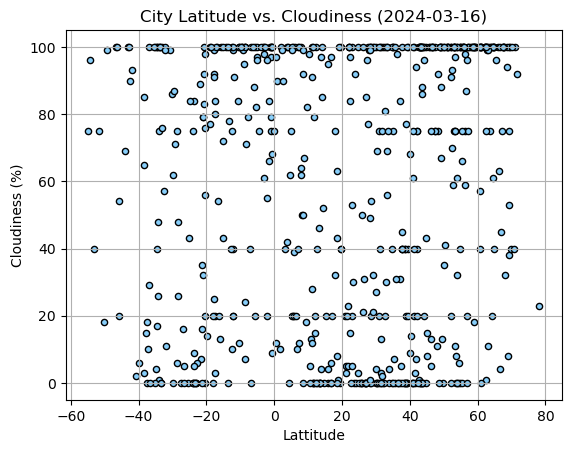

In [12]:
# Scatter plots for latitude vs. cloudiness
city_data_df.plot(x="Lat", y="Cloudiness", kind = "scatter", color = "lightskyblue", edgecolors = "black")


plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid()

# Save figure
plt.savefig("output_data/Fig3.png")


plt.show()

#### Latitude vs. Wind Speed Plot

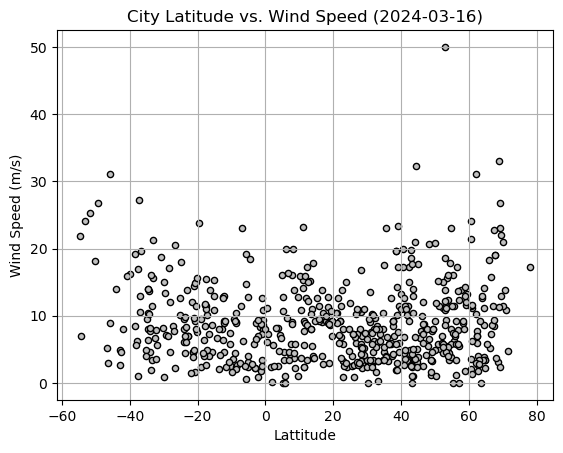

In [13]:
# Scatter plots for latitude vs. wind speed
city_data_df.plot(x="Lat", y="Wind Speed", kind = "scatter", color = "silver", edgecolors = "black")

plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Lattitude")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid()

# Save figure
plt.savefig("output_data/Fig4.png")

plt.show()

---

## Linear Regression for Each Relationship


In [14]:
# Defining function to create Linear Regression plots
def linear_regression(df, col1, col2):
    (slope, intercept, rvalue, pvalue, sterr) = linregress(df[col1], df[col2])
    df.plot(x = col1, y = col2, kind = "scatter")
    x_values = np.array([df[col1].min(), df[col1].max()])
    y_pred = slope * x_values + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.plot(x_values, y_pred, "r-")
    plt.annotate(line_eq, xy=(df[col1].min(), df[col2].min()), fontsize = 15, color = "red", 
                 xytext = (df[col1].min() + 20, df[col2].min() + 20), textcoords=("offset points", "data"))
    plt.xlabel("Latitude")
    plt.ylabel(col2)
    plt.xlim(df[col1].min()-5, df[col1].max()+5)
    plt.ylim(df[col2].min()-10, df[col2].max()+10)
    plt.title(f"Latitude vs. {col2}")
    plt.show()
    print(f"The r-value is {rvalue}")

In [15]:
# Creating DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# View sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Converted_Date,Converted_Date_Only
City_ID,,,,,,,,,,,
1,novodvinsk,64.4165,40.8122,32.79,99,100,8.66,RU,1710617215,2024-03-16 19:26:55,2024-03-16
3,fort bragg,35.1390,-79.0060,74.64,51,75,4.61,US,1710617020,2024-03-16 19:23:40,2024-03-16
5,tiksi,71.6872,128.8694,-18.89,97,92,4.76,RU,1710617021,2024-03-16 19:23:41,2024-03-16
10,olonkinbyen,70.9221,-8.7187,10.69,59,100,10.85,SJ,1710617122,2024-03-16 19:25:22,2024-03-16
12,albany,42.6001,-73.9662,56.95,49,100,3.00,US,1710617175,2024-03-16 19:26:15,2024-03-16


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Converted_Date,Converted_Date_Only
City_ID,,,,,,,,,,,
0,port mathurin,-19.6833,63.4167,79.14,80,14,23.87,MU,1710617215,2024-03-16 19:26:55,2024-03-16
2,waitangi,-43.9535,-176.5597,56.82,80,69,14.00,NZ,1710616996,2024-03-16 19:23:16,2024-03-16
4,pailon,-17.6500,-62.7500,95.90,41,92,15.50,BO,1710617217,2024-03-16 19:26:57,2024-03-16
6,almeirim,-1.5233,-52.5817,81.84,80,84,8.32,BR,1710617217,2024-03-16 19:26:57,2024-03-16
7,port alfred,-33.5906,26.8910,64.18,97,100,1.99,ZA,1710617218,2024-03-16 19:26:58,2024-03-16


###  Temperature vs. Latitude Linear Regression Plot

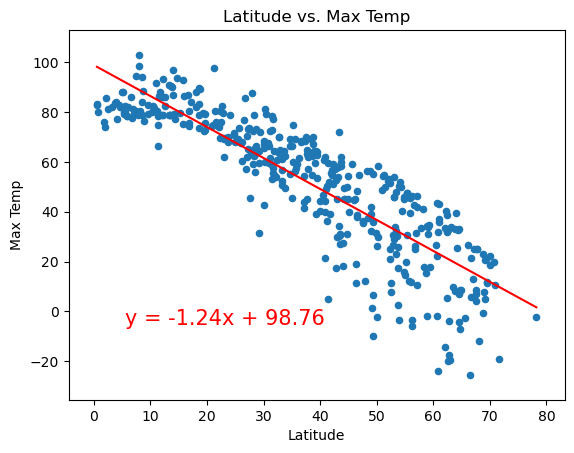

The r-value is -0.8650961913748052


In [17]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Max Temp")

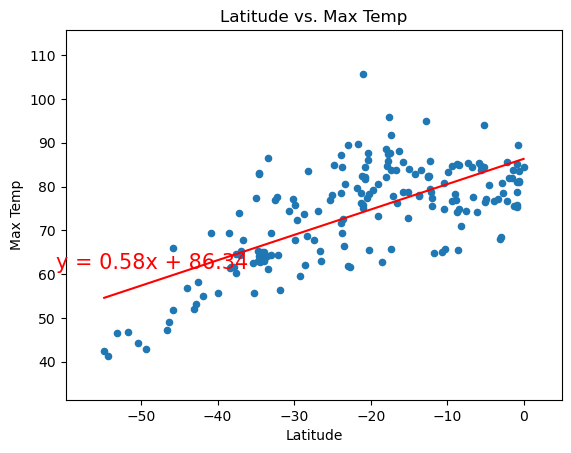

The r-value is 0.6888342372395948


In [18]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** 
Latitude and max temp seems to have a highly negative correlation in the northern hemisphere whereas it has a slightly lower but positive correlation in the southern hemisphere. 

In the northern hemisphere, the high negative correlation means a location is typically colder (i.e., lower temps) when the latitude is higher (i.e., more positive and further away from the equator). On the contrary, in the southern hemisphere, this means a location is typically colder (i.e., lower temps) when the latitude is lower (i.e., more negative and further away from the equator). The lower absolute correlation number of the southern hemisphere means there might be some exceptions to this in certain locales where this may not hold true.

The data reflects what we experience in real life: Alaska is colder (higher latitude in the northern hemisphere) whereas Chile is warmer (higher latitude in the southern hemisphere). 

Latitude appears to be a good predictor of max temperatures in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

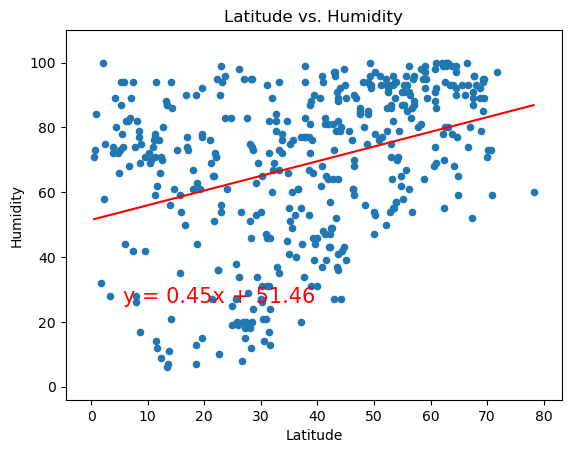

The r-value is 0.35126096860895095


In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Humidity")

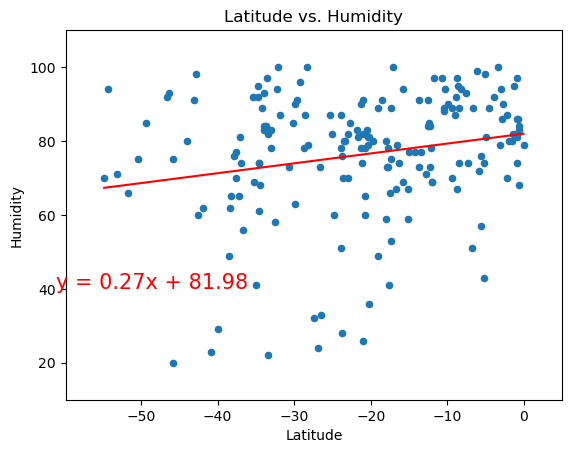

The r-value is 0.21297049063219226


In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** 
There is not a strong correlation between latitude and humdiity in either the northern or southern hemispheres. There are slight positive correlations but not very high (like the temperature correlation). In both hemispheres, the scatterplot shows high humditiy in locations with lower latitude, but not necessarily. There are also locations that have high humdity in lower latitudes as well as locations that have low humidity in both lower latitudes and higher latitudes. In the northern hemisphere, there are fewer locations that have low humditiy in higher latitudes.

Latitude does not appear to be a great predictor of humidity but might be a better predictor in the northern hemisphere than the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

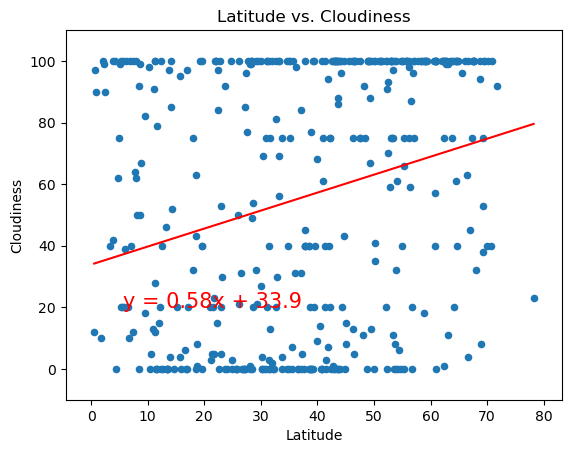

The r-value is 0.2641379038737686


In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Cloudiness")

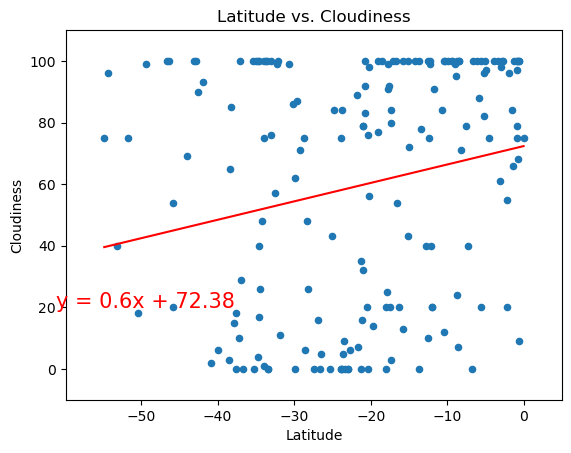

The r-value is 0.20914325232586728


In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** 

There is not a strong correlation between latitude and % cloudiness in either the northern or southern hemispheres. There are slight positive correlations but not very high (like the temperature correlation).There are a few cities grouped together that are very cloudy and not cloudy at all, but across a wide latitude range (i.e., forming a horizontal line straight across at 0% and 100% cloudiness y-axis values). The slight positive correlation means the higher the latitude in both hemipsheres, the cloudier it may be and vice versa (the lower the latitude, the less cloudy) but not necessarily. As we can see in the scatterplot, there are plenty of locations with lower latitudes but higher cloudiness and vice versa with higher latitudes and lower cloudiness. 

Latitude does not appear to be a good indicator of cloudiness percentage of a location.

### Wind Speed vs. Latitude Linear Regression Plot

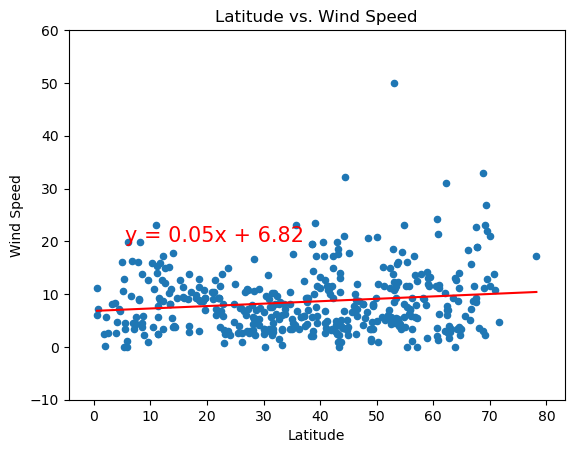

The r-value is 0.1435302170367031


In [23]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Wind Speed")

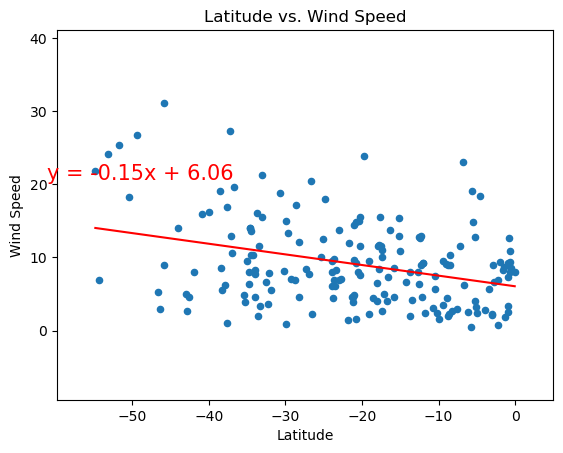

The r-value is -0.33859459292255806


In [24]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Wind Speed")

# Bookmark Discussion: Latitude vs. Wind Speed #
**Discussion about the linear relationship:** 
In the nothern hemisphere, there seems to be a very slight positive correlation between latitude and windspeed. That is, the higher the latitude, locations may have higher windspeed but latitude is not a good predictor of that. There are plenty of datapoints with locations in high latitudes but lower windspeeds.

In the southern hemisphere, there is a stronger albeit negative correlation between latitude and windspeed. Compared to the northern hemisphere, the latitude in the southern hemisphere is a better predictor of windspeed but still not a particularly strong correlation (as we've seen in latitude vs. max temp). This means more locations at higher latitudes would have lower windspeeds and locations at lower latitudes have higher windspeeds. 

Latitude does not appear to be a strong predictor of windspeed and even less of a predictor for locations in the northern hemisphere than the southern hemisphere.